# Plot position data

In [1]:
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

WIDTH = 70

def compute_mean_std(inp):
  mean = inp.mean(axis=1)
  std = inp.std(axis=1)  
  return mean, std

def preprocess(x, y):
  position = np.vstack((x,y))
  mean, std = compute_mean_std(position)
  print(f"mean:{mean}, std:{std}")
  position = (position.T - mean) / std
  return position


with open('brands-hatch-indy.pickle', 'rb') as f:
  data = pickle.load(f)

x = [x[0] for x in data[1]]
y = [-x[1] for x in data[1]] # remove minus sign for pygame.draw.line() in minimap.py

position = preprocess(x, y)
position *= WIDTH


mean:[-98.43143378 269.27969512], std:[196.47067901 113.8373942 ]


$$
[
\begin{array}{*{3}{c}}x & z & 1
\end{array}
]
\rightarrow
[
\begin{array}{*{2}{c}}\frac{x -\mu(x)}{\sigma(x)} & \frac{z -\mu(z)}{\sigma(z)}
\end{array}
]
$$
$$
M =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\frac{-\mu(x)}{\sigma(x)} & \frac{-\mu(z)}{\sigma(z)}\\
\end{bmatrix}
$$

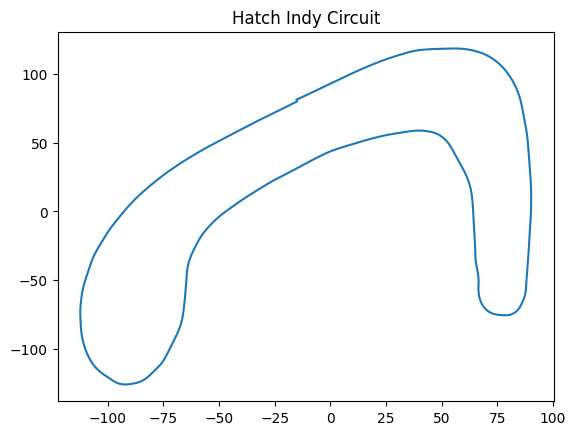

In [2]:
x = position[:,0]
y = position[:,1]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Hatch Indy Circuit")
plt.show()

In [3]:
dist = len(x) / (1/60) * 1e-5
print(f"distance in km: {dist}")

distance in km: 2.3076000000000003


In [4]:
laptime = str(datetime.timedelta(seconds=len(x) * 1/60))
print(f"race lap time: {laptime}")

race lap time: 0:01:04.100000
